# **LOADING DATA**

In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/superstore-sales-dataset/SampleSuperstore.csv", encoding='latin1')  
# latin1 we use bcoz there are some special char and bydefault it is UTF8
df.head() #df => dataframe

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **CLEANING DATA**

In [2]:
# Clean Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Convert order_date to Datetime Format
df['order_date'] = pd.to_datetime(df['order_date'])
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date                object
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub-category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

In [4]:
#  Group Daily Sales
daily_sales = df.groupby('order_date')['sales'].sum().reset_index()
daily_sales.head()

,order_date,sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [5]:
#  Rename Columns for Prophet
daily_sales.columns = ['ds', 'y']
daily_sales.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [6]:
#  Save Cleaned Data
daily_sales.to_csv("cleaned_sales.csv", index=False)

# **USING PROPHET**

In [7]:
!pip install prophet

In [8]:
#  Import Prophet & Load Clean Data

from prophet import Prophet
import pandas as pd

# Load the cleaned data if needed
df = pd.read_csv("cleaned_sales.csv")  
df.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [9]:
# Initialize & Train Prophet Model

model = Prophet()
model.fit(df)

10:59:57 - cmdstanpy - INFO - Chain [1] start processing
10:59:57 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
#  Create Future Dataframe for Prediction

future = model.make_future_dataframe(periods=30)
future.tail()

,ds
1262,2018-01-25
1263,2018-01-26
1264,2018-01-27
1265,2018-01-28
1266,2018-01-29


In [11]:
#  Forecast Future Sales

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1262,2018-01-25,1968.352652,-939.086347,4849.446035
1263,2018-01-26,2265.464482,-458.734739,4855.558368
1264,2018-01-27,1893.923095,-692.526682,4699.861059
1265,2018-01-28,2095.203388,-526.366962,4764.486488
1266,2018-01-29,2313.794582,-431.937293,5037.760056


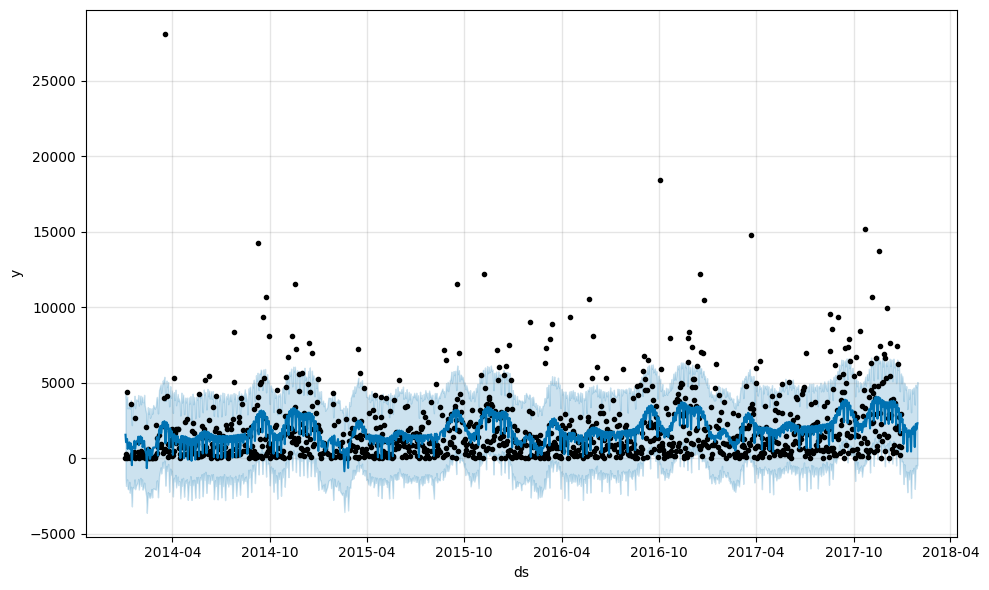

In [12]:
#  Plot Forecasted Results

fig = model.plot(forecast)

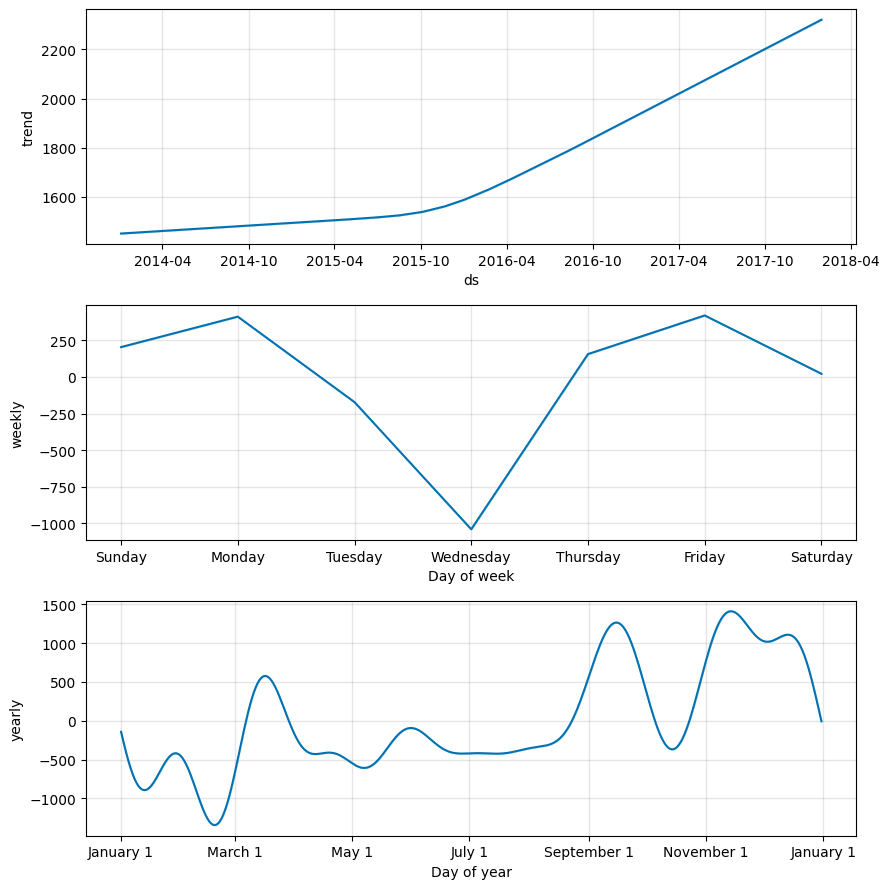

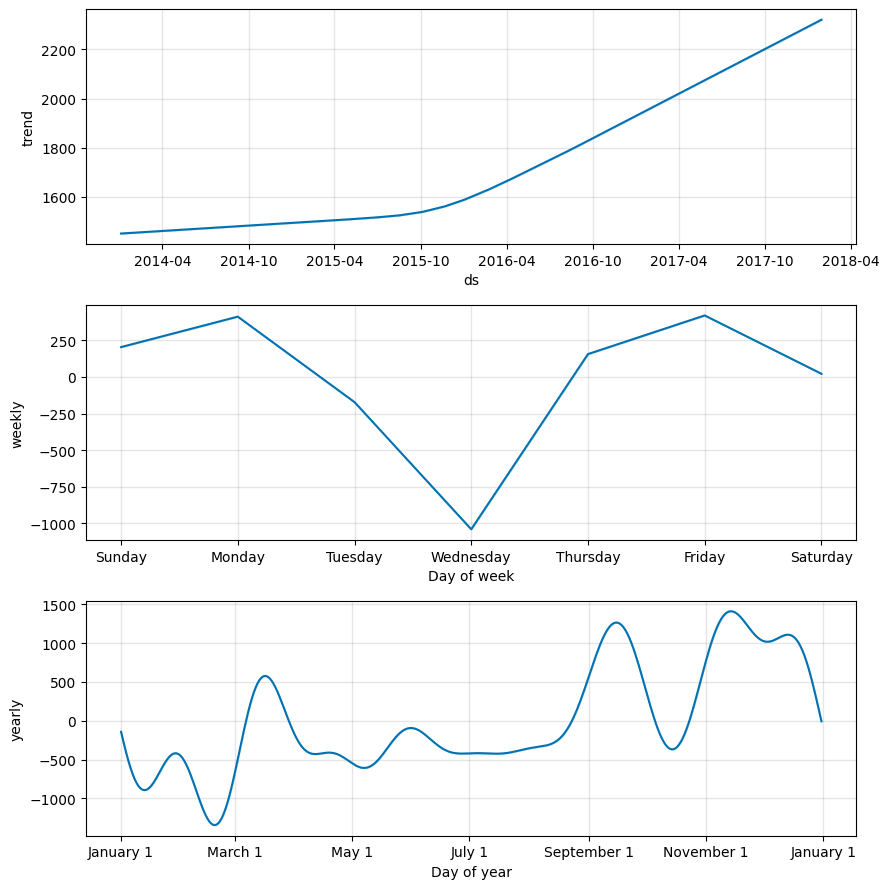

In [13]:
#  Plot Trend Components

model.plot_components(forecast)

# **USE EDA**

## 1. **Monthly Sales Trend**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/kaggle/input/superstore-sales-dataset/SampleSuperstore.csv", encoding='latin1')
df.columns = df.columns.str.strip() # remove unwanted spaces
df['Order Date'] =pd.to_datetime(df['Order Date']) #convert Order Date to datetime to fetch month week day

In [16]:
#from each row of Order Date we are fetching all this
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Week'] = df['Order Date'].dt.isocalendar().week
df['Day'] = df['Order Date'].dt.day
df['DayOfWeek'] = df['Order Date'].dt.dayofweek

In [17]:

df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [18]:
# some manually holiday we given
import datetime
df['IsHoliday'] = df['Order Date'].isin([
    datetime.datetime(2019, 1, 1),
    datetime.datetime(2019, 8, 15),
    datetime.datetime(2019, 10, 2),
    datetime.datetime(2019, 12, 25)
]).astype(int)

In [19]:

df['7D_MA'] = df['Sales'].rolling(window=7).mean()  # 7 days moving average

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


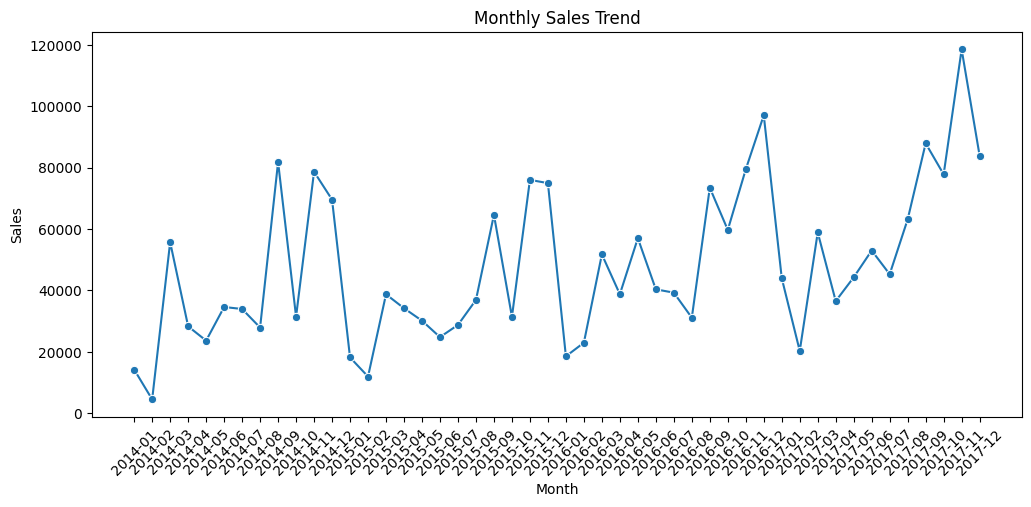

In [23]:
# Total Sales per Month
df['Month']=df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month']=monthly_sales['Month'].astype(str)
plt.figure(figsize=(12,5)) # graph canvas size
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o') # marker='o' means graph will dot
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.show()

## 2. **Sales by Category**

In [24]:
category_sales = df.groupby('Category')[['Sales','Profit']].sum().reset_index()

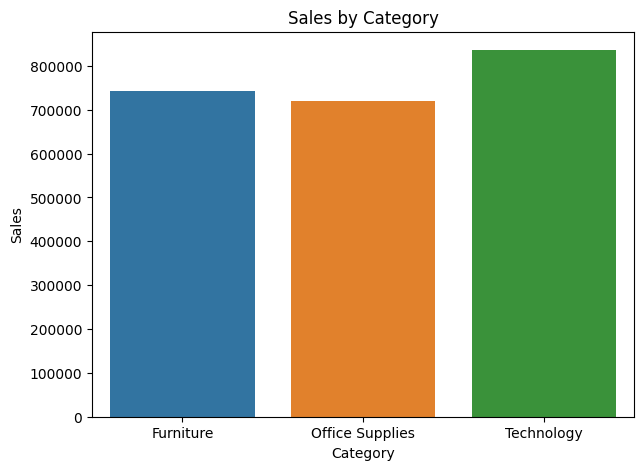

In [25]:
# Category by sales
plt.figure(figsize=(7,5))
sns.barplot(data=category_sales, x='Category', y='Sales')
plt.title('Sales by Category')
plt.show()

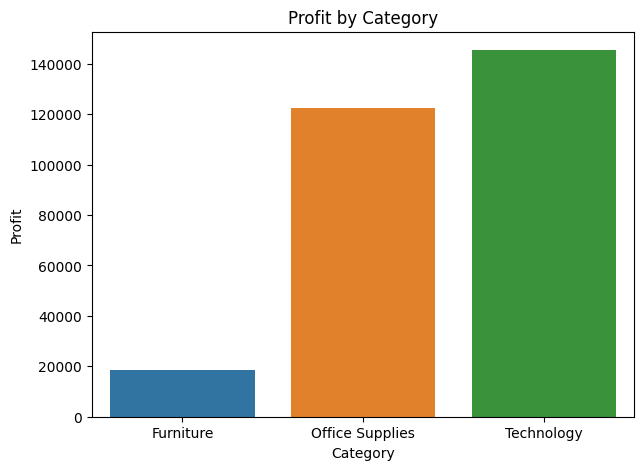

In [26]:
# Category by Profit
plt.figure(figsize=(7,5))
sns.barplot(data=category_sales, x='Category', y='Profit')
plt.title('Profit by Category')
plt.show()

## **3. Profit by Region**

In [27]:
region_profit = df.groupby('Region')[['Sales','Profit']].sum().reset_index()

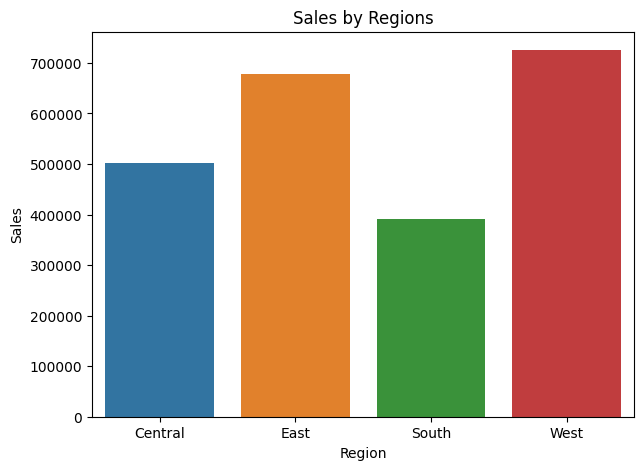

In [28]:
#Region by Sales
plt.figure(figsize=(7,5))
sns.barplot(data=region_profit, x='Region', y='Sales')
plt.title('Sales by Regions')
plt.show()

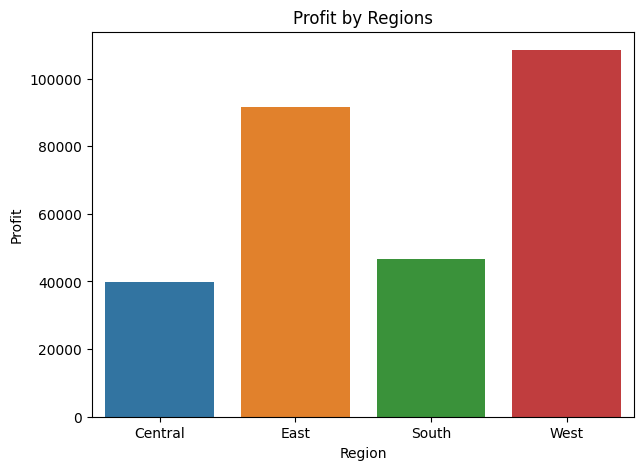

In [29]:
#Region by Profit
plt.figure(figsize=(7,5))
sns.barplot(data=region_profit, x='Region', y='Profit')
plt.title('Profit by Regions')
plt.show()

## **4. Top 10 Products by Sales**

In [30]:
top_products = df.groupby('Product Name')[['Sales','Profit']].sum().nlargest(10, 'Sales').reset_index()

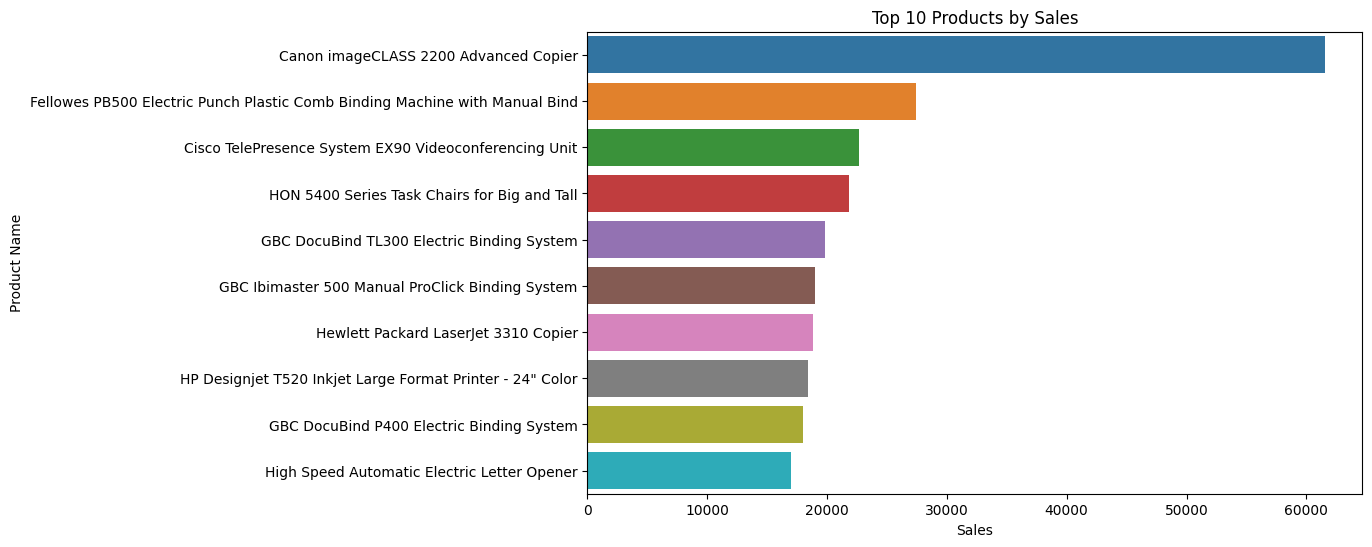

In [31]:
# Product by sales
plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='Sales', y="Product Name")
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

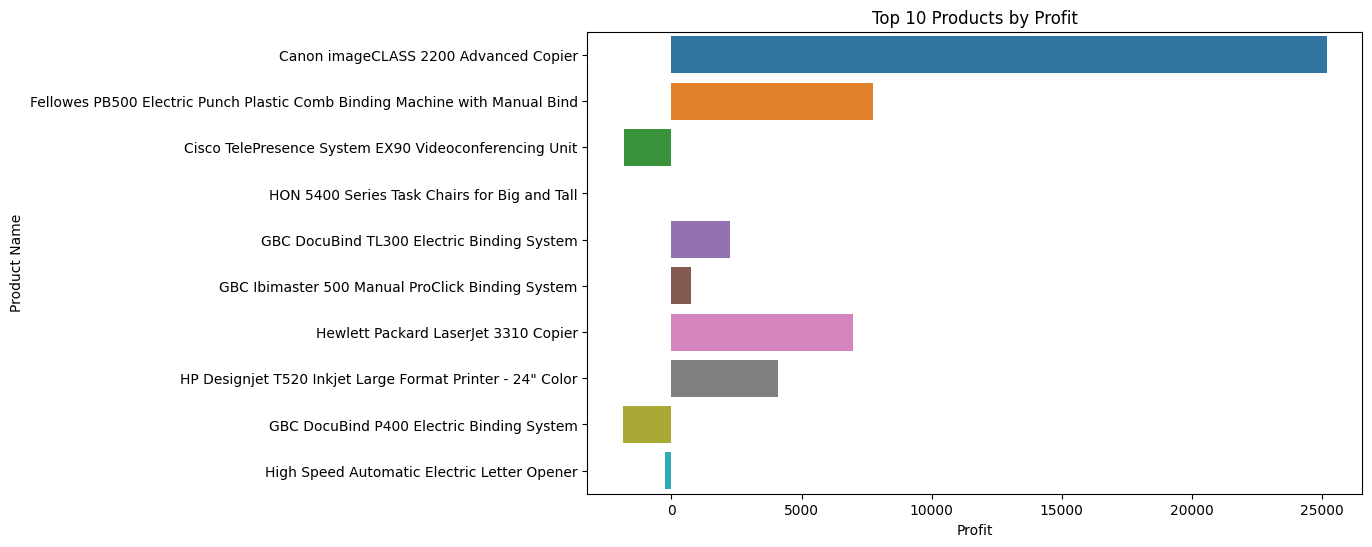

In [32]:
#product by Profit
plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='Profit', y="Product Name")
plt.title('Top 10 Products by Profit')
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.show()

# **MONTHLY SALES vs PROFIT ANALYSIS**

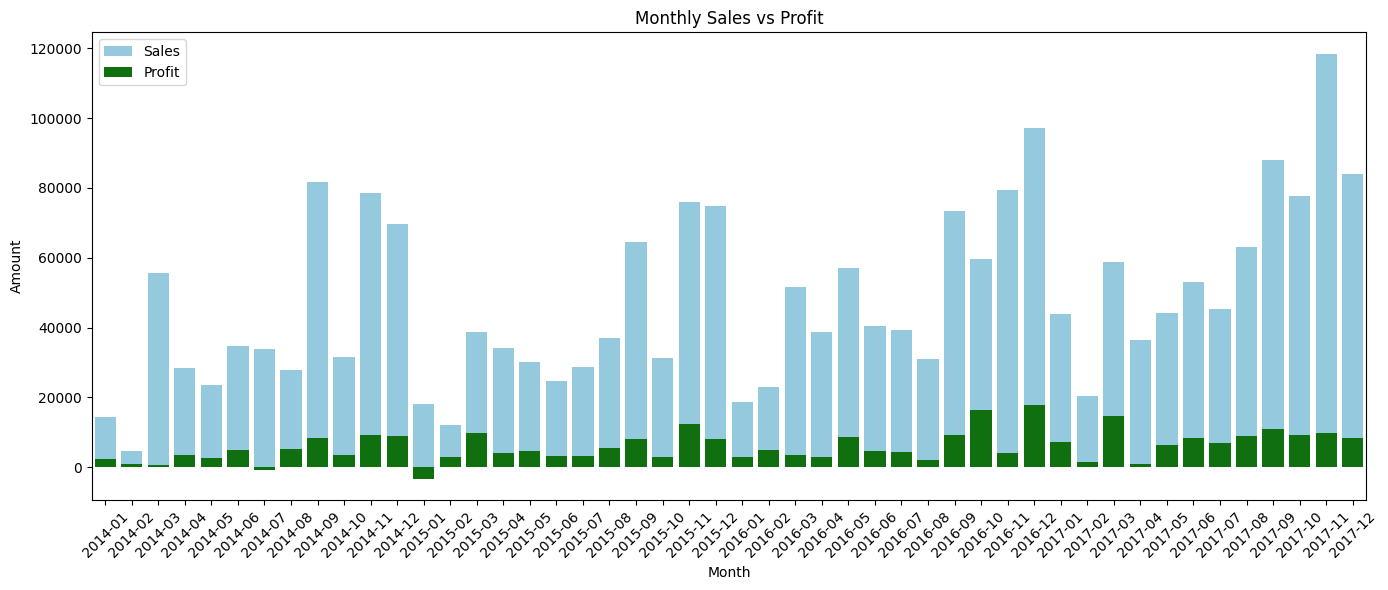

In [33]:
# new column create : Month
df['Month'] = df['Order Date'].dt.to_period('M')

# Group by Month and aggregate Sales and Profit
monthly_data = df.groupby('Month')[['Sales', 'Profit']].sum().reset_index()

# Month column to string for plotting
monthly_data['Month']=monthly_data['Month'].astype(str)

# Plotting
plt.figure(figsize=(14,6))
sns.barplot(data=monthly_data, x='Month', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=monthly_data, x='Month', y='Profit', color='green', label='Profit')
plt.xticks(rotation=45)
plt.title('Monthly Sales vs Profit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

# **CATEOGRY-WISE SALES AND PROFIT ANALYSIS**

In [34]:
# Make Group Category-wise

category_perf = df.groupby('Category')[['Sales','Profit']].sum().reset_index()

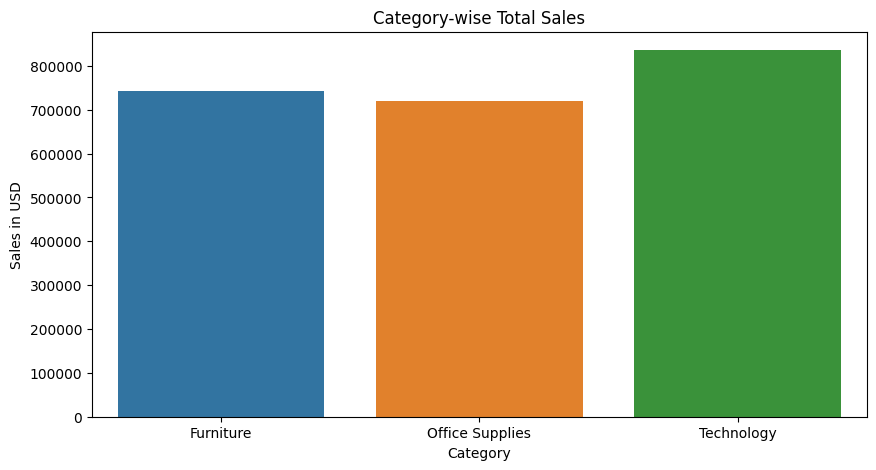

In [35]:
# make plot
plt.figure(figsize=(10,5))
sns.barplot(data=category_perf, x='Category', y='Sales')
plt.title('Category-wise Total Sales')
plt.ylabel('Sales in USD')
plt.show()

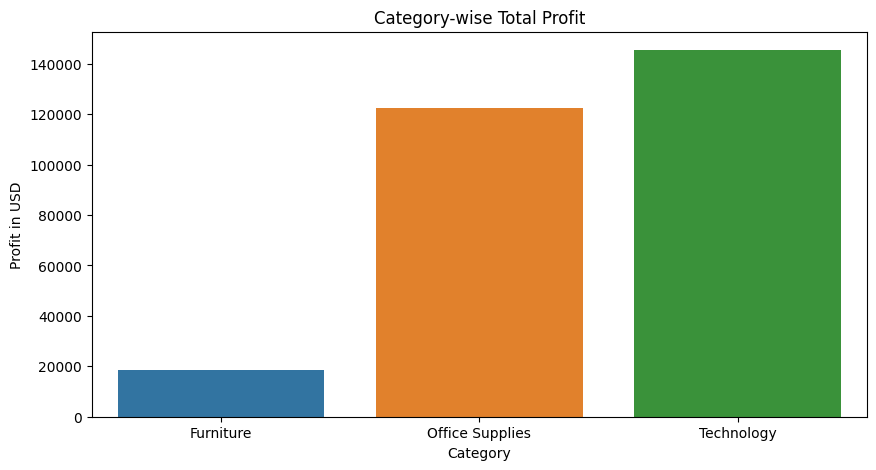

In [36]:
#Profit  bar plot
plt.figure(figsize=(10,5))
sns.barplot(data=category_perf, x='Category', y='Profit')
plt.title('Category-wise Total Profit')
plt.ylabel('Profit in USD')
plt.show()

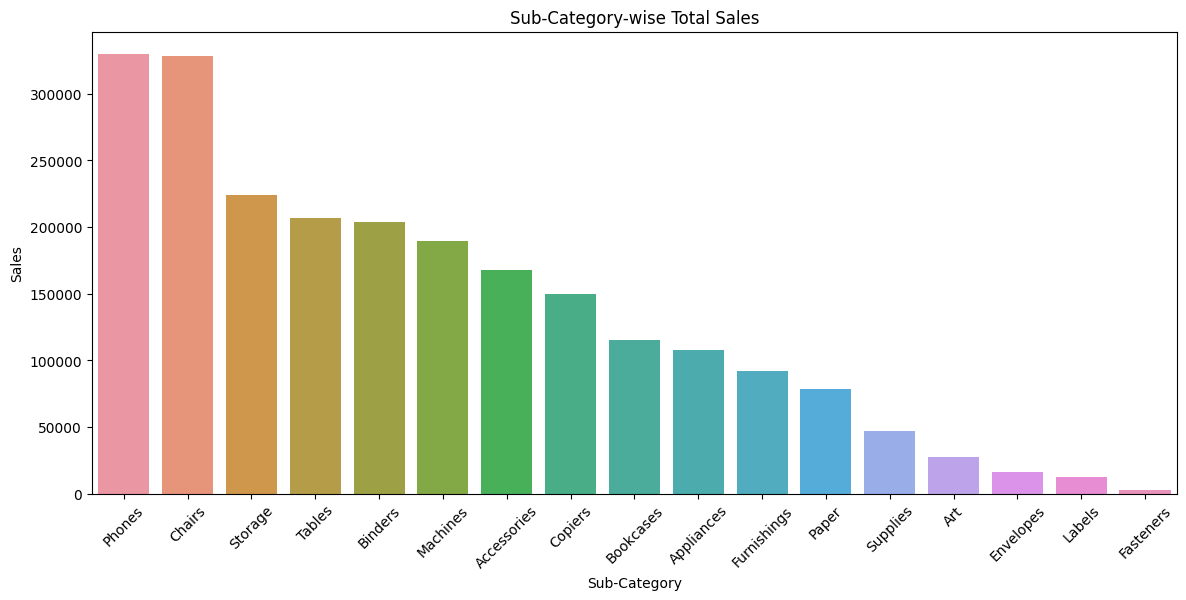

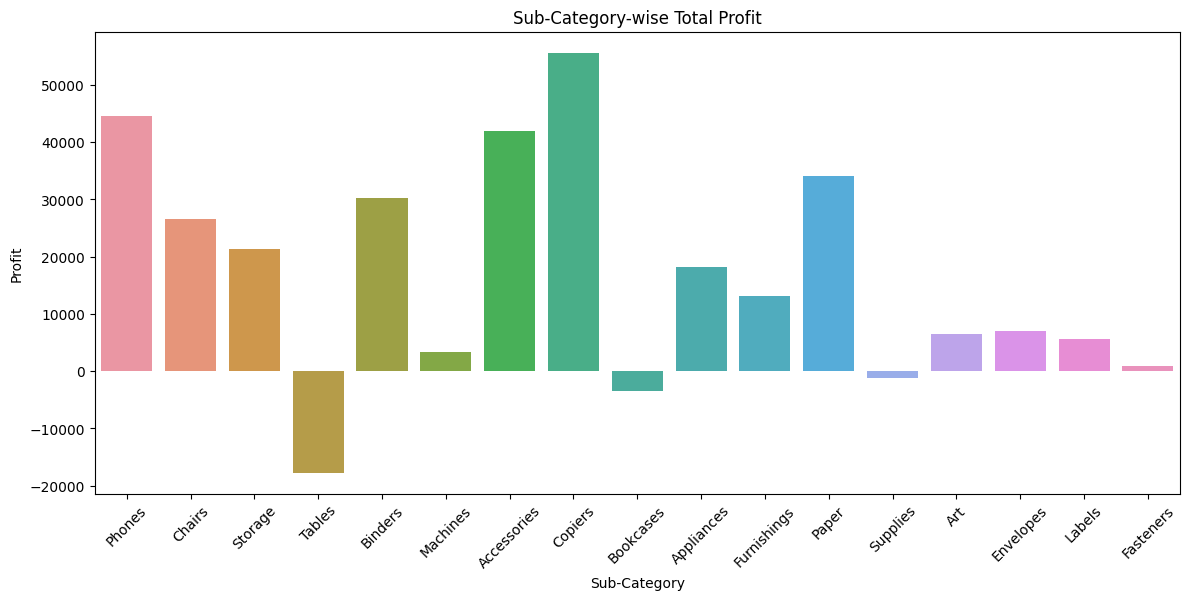

In [37]:
#Sub-Category-wise Total Sales

subcat_perf = df.groupby('Sub-Category')[['Sales','Profit']].sum().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=subcat_perf.sort_values(by='Sales', ascending=False), x='Sub-Category', y='Sales')
plt.title('Sub-Category-wise Total Sales')
plt.xticks(rotation=45) #tilted text in x axis
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(data=subcat_perf.sort_values(by='Sales', ascending=False), x='Sub-Category', y='Profit')
plt.title('Sub-Category-wise Total Profit')
plt.xticks(rotation=45)
plt.show()